# Exploración de datos sobre Airbnb en Nueva York 2019. Análisis, visualización y predicción

Este archivo de datos incluye toda la información necesaria para saber más sobre los hosts, la disponibilidad geográfica, las métricas necesarias para hacer predicciones y sacar conclusiones.

In [39]:
# Importando librerías necesarias para el análisis del Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Cargamos el conjunto de datos a nuestro Dataframe

df = pd.read_csv("/workspaces/machine-learning-python-template/data/raw/AB_NYC_2019.csv")

# Visualizamos las dimensiones e informacion del conjunto de datos

print(df.shape)


(48895, 16)


El DataFrame contiene 48.895 registros (filas) y 16 variables (columnas).

In [41]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [42]:
# Visualizamos los tipos de datos de cada columna del Dataframe

df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

El conjunto de datos contiene 7 variables categóricas (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type).

Y contiene 9 variables numéricas (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365).

In [43]:
# Removiendo datos duplicados si existen

df.duplicated().sum()
df.drop_duplicates(inplace=True)

Luego de visualizar previamente la cabecera del conjunto de datos, se puede notar que existen algunos valores NaN, por lo tanto necesitamos examinar más a fondo los valores faltantes antes de continuar con el análisis


In [44]:
#buscando averiguar primero qué columnas tienen valores nulos
#utilizando la función 'sum' veremos cuántos valores nulos hay en cada columna del conjunto de datos

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Los datos ausentes que se observan no necesitan un tratamiento demasiado especial. Si nos fijamos en la naturaleza de nuestro conjunto de datos, podemos afirmar otras cosas: las columnas "id", "name" y "host_name" son irrelevantes e insignificantes para nuestro análisis de datos; las columnas "last_review" es la fecha; si no hay valoraciones para el anuncio, la fecha simplemente no existe. En nuestro caso, esta columna es irrelevante e insignificante, por lo que no es necesario añadir esos valores.

Para la columna "review_per_month" podemos simplemente añadirle 0.0 para los valores que faltan; podemos ver que en "number_of_review" esa columna tendrá un 0, por lo tanto siguiendo esta lógica con 0 opiniones totales habrá 0.0 tasa de opiniones por mes.

Por lo tanto, vamos a proceder con la eliminación de las columnas que no son importantes y el manejo de los datos que faltan.

In [45]:
#eliminando las columnas que no son significativas o que podrían ser poco éticas para utilizarlas en nuestra futura exploración y predicción de datos.
df.drop(['id','name','host_id','host_name','latitude','longitude','last_review'], axis=1, inplace=True)

In [46]:
#Examinando los cambios
print(df.shape)
df.head(3)

(48895, 9)


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365


In [47]:
#reemplazando todos los valores NaN en 'reviews_per_month' por 0
df.fillna({'reviews_per_month':0}, inplace=True)

In [48]:
#Examinando los cambios
df.reviews_per_month.isnull().sum()

0

In [49]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               48895 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.4+ MB


## Análisis y visualización de variables univariante
Para variables categoricas: neighbourhood_group, neighbourhood y room_type.


### neighbourhood_group

In [50]:
#examinamos los valores únicos de n_group ya que esta columna será muy útil para análisis posteriores

df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [51]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

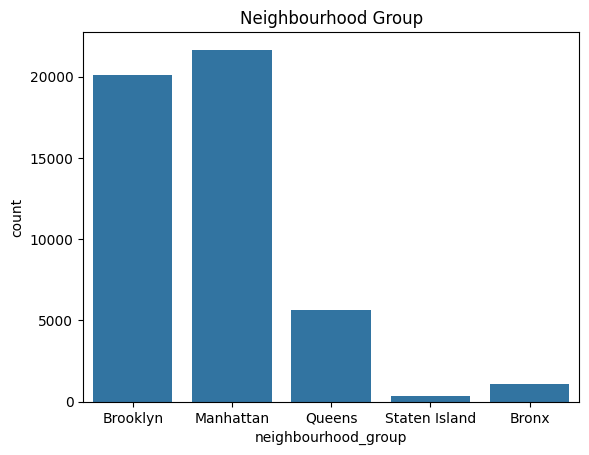

In [52]:
sns.countplot(x="neighbourhood_group", data=df)
plt.title('Neighbourhood Group')
plt.show()

Por parte del Neighbourhod group, podemos observar que la mayoria de los ABnB se concentran en Manhattan y Brooklyn, con una cantidad de inmuebles para alquiler en cada zona de aproximadamente 20K registros, siendo Manhattan donde mas oferta de ABnB podemos encontrar. Despues nos encontramos con Queens, Bronx y State Island siendo este ultimo el que tiene el menor oferta de ABnB.

### neighbourhood

In [53]:
#examinamos los valores únicos de neighbourhood ya que esta columna será muy útil para análisis posteriores
len(df.neighbourhood.unique())

221

In [54]:
df2=pd.DataFrame(df['neighbourhood'].value_counts()).reset_index().rename(columns={'index': 'neighbourhood','neighbourhood':'count'})
df2

,count,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
...,...,...
216,Fort Wadsworth,1
217,Richmondtown,1
218,New Dorp,1
219,Rossville,1


<BarContainer object of 10 artists>

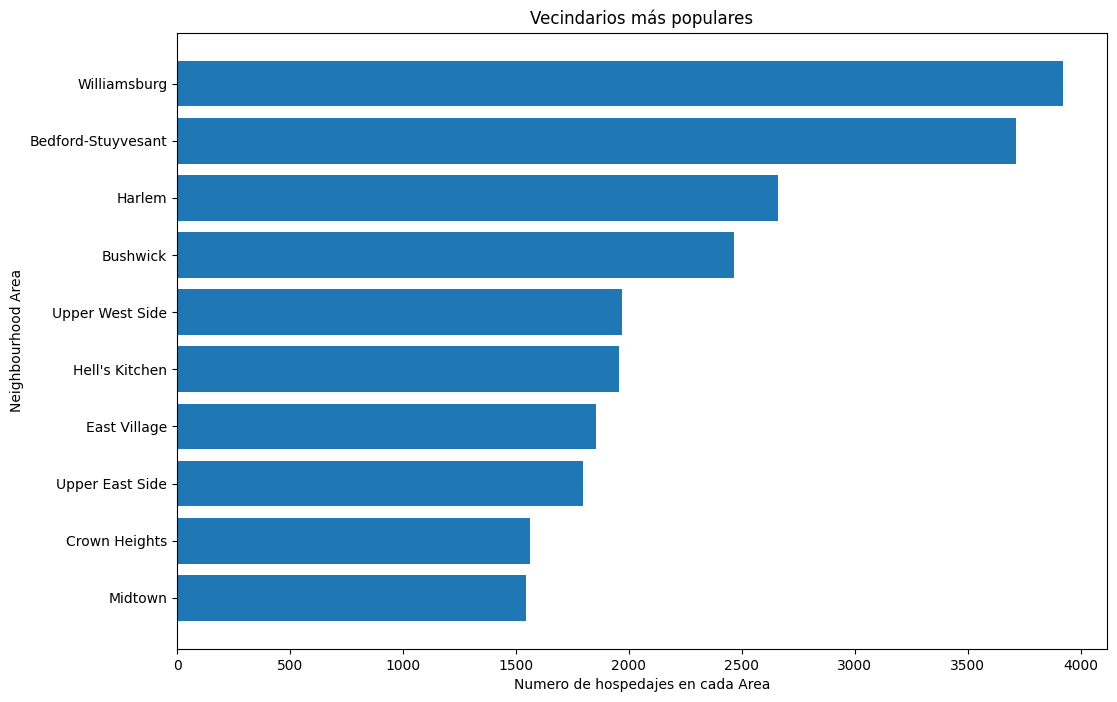

In [55]:
data = df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Vecindarios más populares")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Numero de hospedajes en cada Area")

plt.barh(x, y)

### Room type

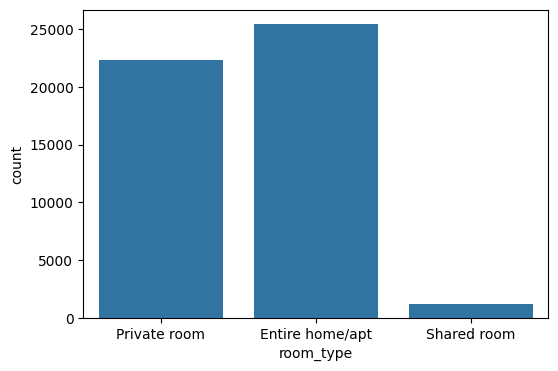

In [56]:
plt.figure(figsize = (6, 4))
sns.countplot(x="room_type", data=df)
plt.show()

In [57]:
count_type = df['room_type'].value_counts().get('Shared room', 0)
print(count_type)

1160


La mayor cantidad de ofertas se encuentran para casas o apartamentos completos (Entire home/apt), le sigue cuartos privados (Private Room). La oferta de cuartos compartidos (Shared Room) es menor al 10% de la oferta para cada uno de los otros grupos.

## Análisis y visualización de variables numéricas

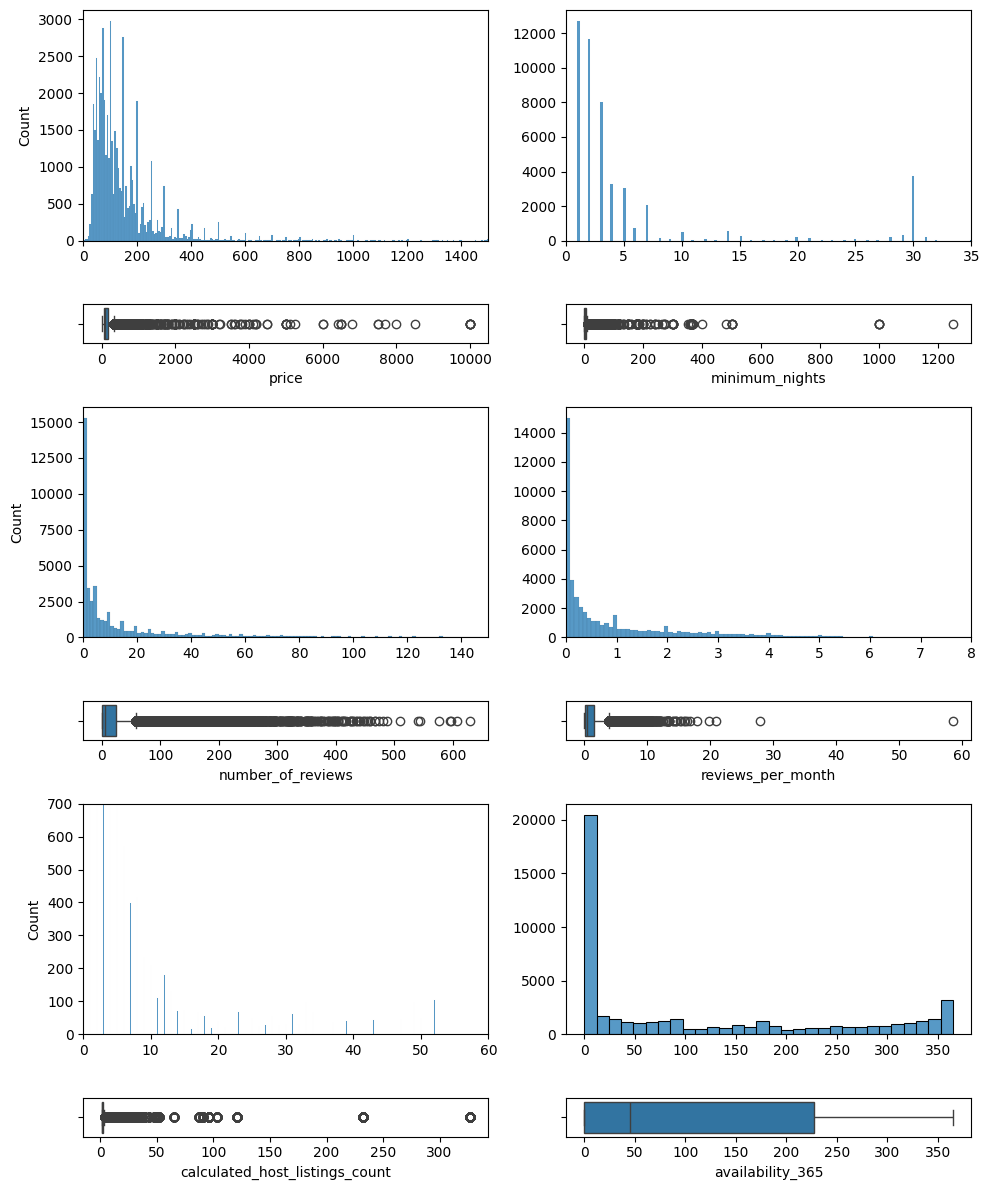

In [58]:
fig, axis = plt.subplots(6, 2, figsize = (10, 12), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
axis[0, 0].set_xlim(0, 1500)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights").set(xlabel=None, ylabel = None)
axis[0, 1].set_xlim(0, 35)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews").set(xlabel = None)
axis[2, 0].set_xlim(0, 150)
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2, 1], data = df, x = "reviews_per_month").set(xlabel = None, ylabel = None)
axis[2, 1].set_xlim(0, 8)
sns.boxplot(ax = axis[3, 1], data = df, x = "reviews_per_month")

sns.histplot(ax = axis[4, 0], data = df, x = "calculated_host_listings_count").set(xlabel = None)
axis[4, 0].set_xlim(0, 60)
axis[4, 0].set_ylim(0, 700)
sns.boxplot(ax = axis[5, 0], data = df, x = "calculated_host_listings_count")

sns.histplot(ax = axis[4, 1], data = df, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = df, x = "availability_365")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [59]:
print(df['price'].mode())
print(df['minimum_nights'].mode())
print(df['availability_365'].mode())

0    100
Name: price, dtype: int64
0    1
Name: minimum_nights, dtype: int64
0    0
Name: availability_365, dtype: int64


- La mayoría de los precios están en el rango entre 0-$250
- El precio que mas se repite entre los Abnb es de $100
- La mayoría exigen menos de 10 noches mínimas de hospedaje.
- La mayoría poseen menos de 50 reviews y menos de 2 reviews por mes.
- En la variable availability_365, encontramos que su moda se encuentra en 0, que nos indicaria que gran mayoría de estos hospedajes son cuartos privados y casa/apto completo, esto pudiera explicarse por el hecho de que estuvieron alquilados a una sola persona o familia durante todo el año 2019

## Análisis de variables multivariante


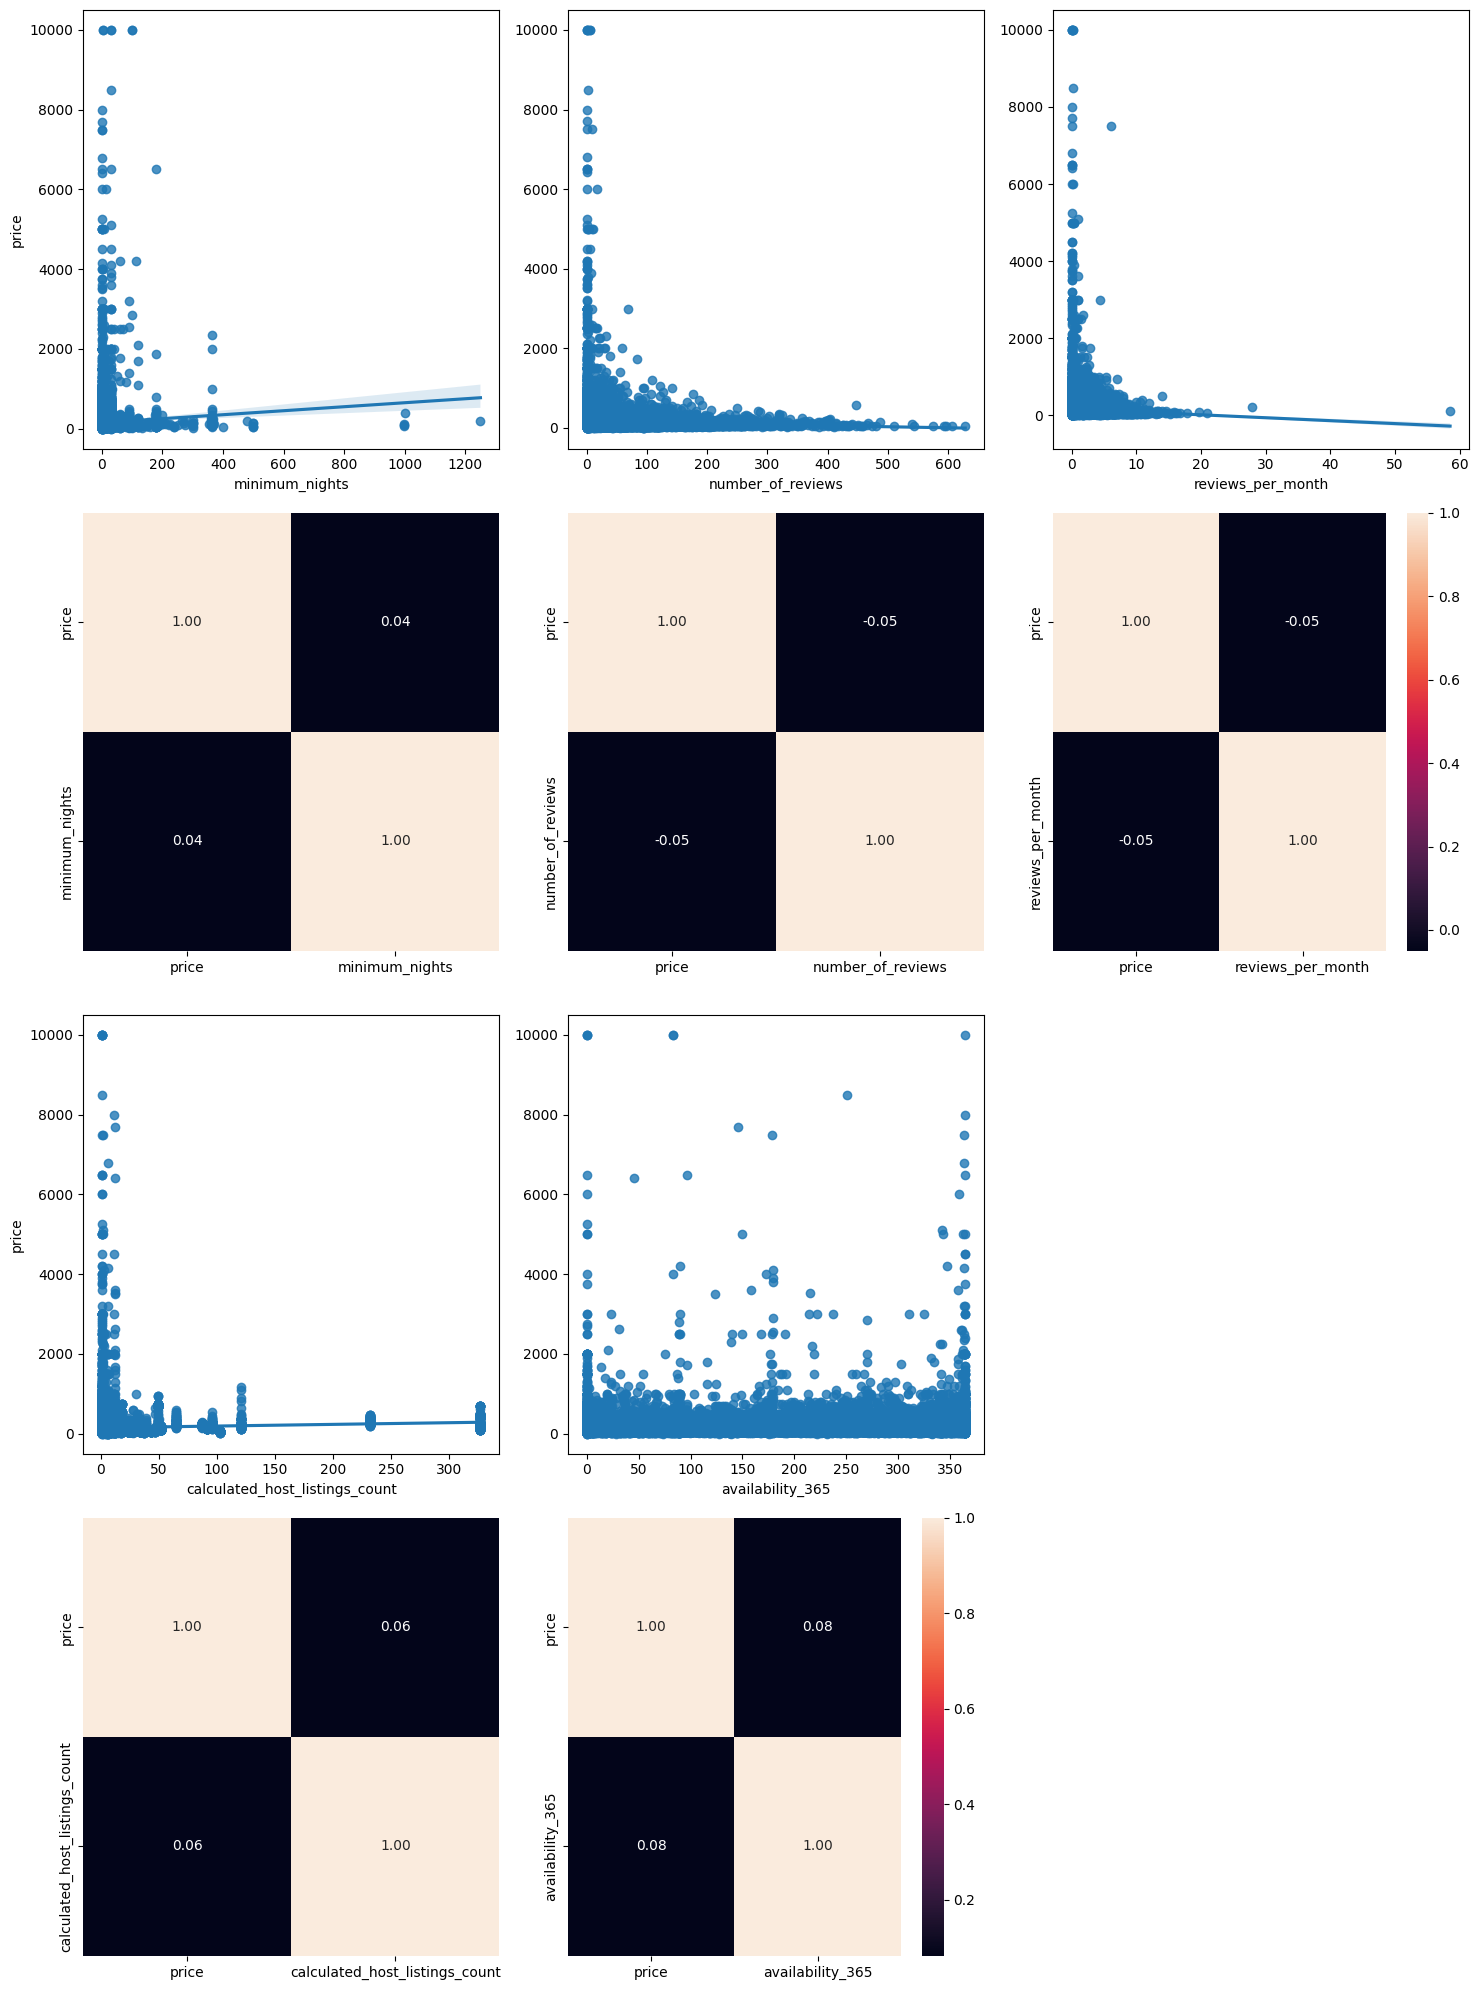

In [60]:
fig, axis = plt.subplots(4,3, figsize = (15, 20))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0,0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)

sns.regplot(ax = axis[0,2], data = df, x = "reviews_per_month", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2])

sns.regplot(ax = axis[2,0], data = df, x = "calculated_host_listings_count", y = "price")
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3,0], cbar = False)

sns.regplot(ax = axis[2,1], data = df, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(df[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[3,1])

plt.tight_layout()

fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])
# Mostrar el plot
plt.show()

Se puede concluir que entre las variables numericas del dataset, no existe una relacion de peso o significancia importante entre la variable considerada y el precio del alquiler (price).

In [61]:
print(df.shape)
print()
print(df.info())
print()
df.head(2)

(48895, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   reviews_per_month               48895 non-null  float64
 7   calculated_host_listings_count  48895 non-null  int64  
 8   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.4+ MB
None



,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355


Relacion entre las variables



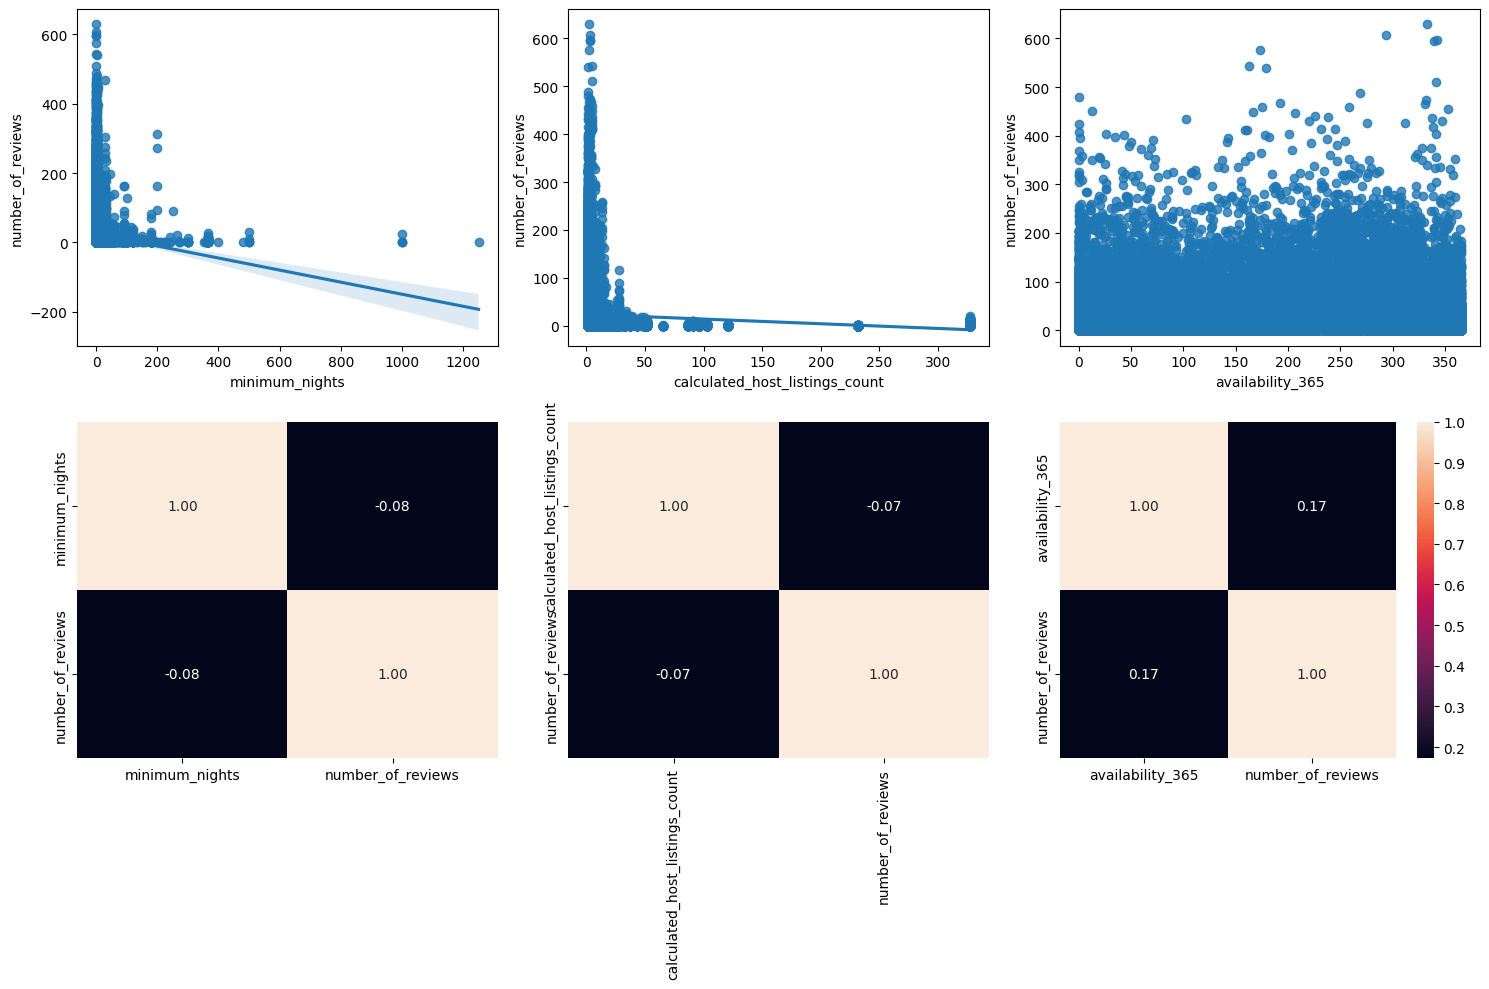

In [62]:
fig, axis = plt.subplots(2,3, figsize = (15, 10))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0,0], data = df, x = "minimum_nights", y = "number_of_reviews")
sns.heatmap(df[["minimum_nights", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "calculated_host_listings_count", y = "number_of_reviews")
sns.heatmap(df[["calculated_host_listings_count", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,1], cbar = False)

sns.regplot(ax = axis[0,2], data = df, x = "availability_365", y = "number_of_reviews")
sns.heatmap(df[["availability_365", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1,2])

plt.tight_layout()
# Mostrar el plot
plt.show()

 Entre las variables numericas no existe una relacion significativa, siendo la mayor de un 23% que se refiere a la disponibilidad vs numero de Airbnb por host, lo cual tiene sentido ya que si un host tiene mas de una propiedad es mas probable que tenga mas dias disponibles de Airbnb.

## Relacion entre variables categoricas


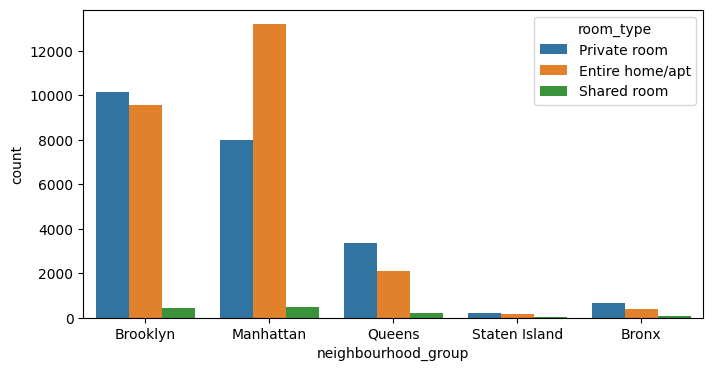

In [63]:
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='neighbourhood_group',hue='room_type')
plt.show()

- Manhattan es el único grupo de vecindario donde existen más casas/apt. completos para alquilar, respecto al resto de las modalidades
y posee la mayor cantidad de alquileres disponibles.
- Brooklyn es el segundo con mayor disponibilidad en alquileres, pero lideran los cuartos privados. Los cuartos privados lideran en todos los vecindarios excepto en Brooklyn.
La cantidad de alquileres de cuartos compartidos es notoriamente baja respecto al resto de las modalidad, ocurre para todos los grupos de vencindarios.
La cantidad de ofertas en Staten Island es sumamente baja respecto al resto de los grupos de vecindarios.
No se observa relación notaria entre el grupo de vecindario y el tipo de alquiler.

## Relación entre Neighbourhood_Group, Room Type, y Price



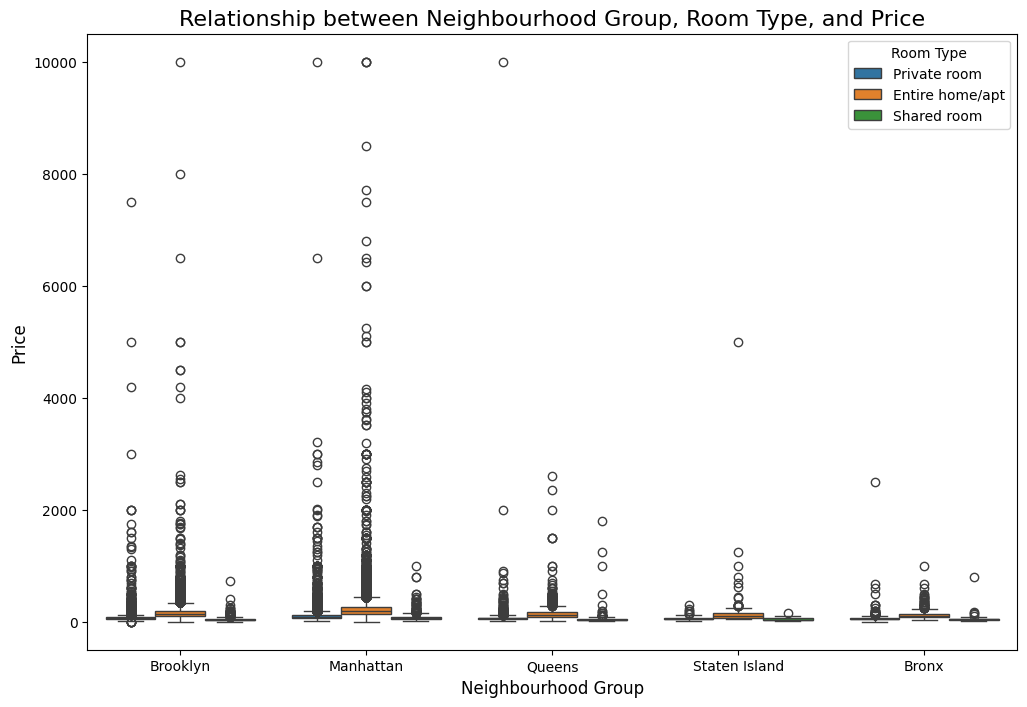

In [64]:
plt.figure(figsize=(12, 8))  # Tamaño del gráfico
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.xlabel('Neighbourhood Group', fontsize=12)  # Etiqueta para el eje x
plt.ylabel('Price', fontsize=12)  # Etiqueta para el eje y
plt.title('Relationship between Neighbourhood Group, Room Type, and Price', fontsize=16)  # Título
plt.legend(title='Room Type', loc='upper right')  # Alinear la leyenda a la derecha
plt.show()

En la gráfica comparativa, se muestra la distribución de precios de diferentes tipos de habitaciones en varios vecindarios. En Brooklyn, los cuartos privados son los más caros. En Manhattan, tanto los cuartos privados como las casas completas tienen un precio cercano a $10,000, pero hay más casas completas disponibles en ese rango. Queens también ofrece cuartos privados en el mismo rango de precio

Análisis Numérico-Categórico (completo)

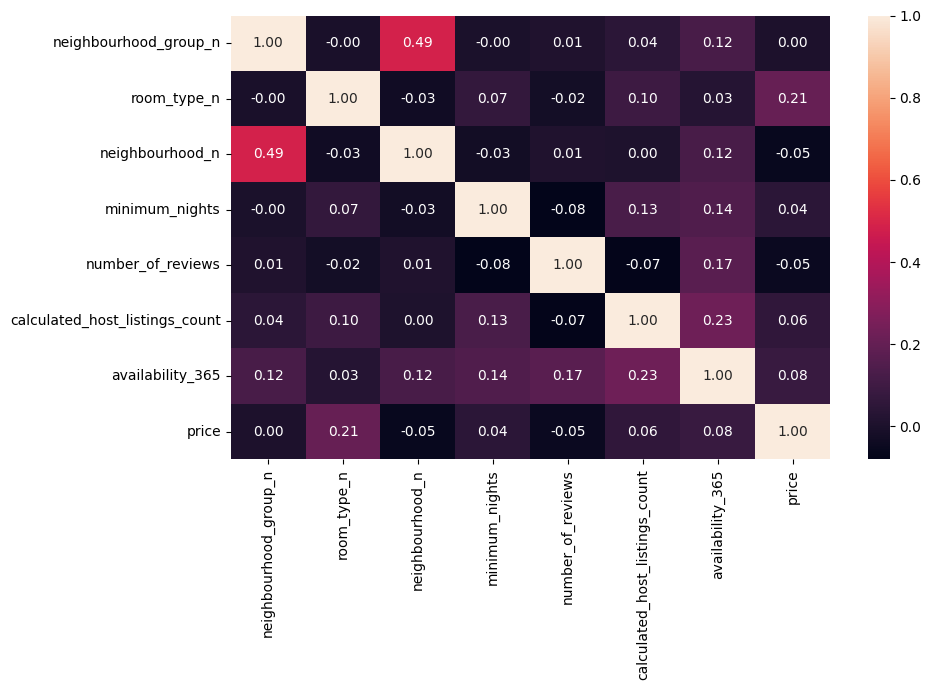

In [65]:
plt.figure(figsize=(10, 7))

df["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df["room_type_n"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]

sns.heatmap(df[["neighbourhood_group_n", "room_type_n", "neighbourhood_n", 
                   "minimum_nights", "number_of_reviews", "calculated_host_listings_count", 
                   "availability_365", "price"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

En el gráfico, mapa de calor, podemos observar lo siguiente:

- Las variables con mayor relacion son neighbourhood y neighbourhood_group, ya que basicamente uno pertence al otro.
- Existe una relación directa del 21% entre el precio y el tipo de habitacion, lo cual tiene sentido ya que dependiendo del tipo de cuarto seria el costo que pagarias por noche.
- Existe una relación directa aunque no muy fuerte entre el número de hospedajes de un host y la disponibilidad al año.
- No existe relación alguna entre el grupo de vecindario y el precio.
- No existe relación alguna entre el grupo de vecindario y el tipo de hospedaje.

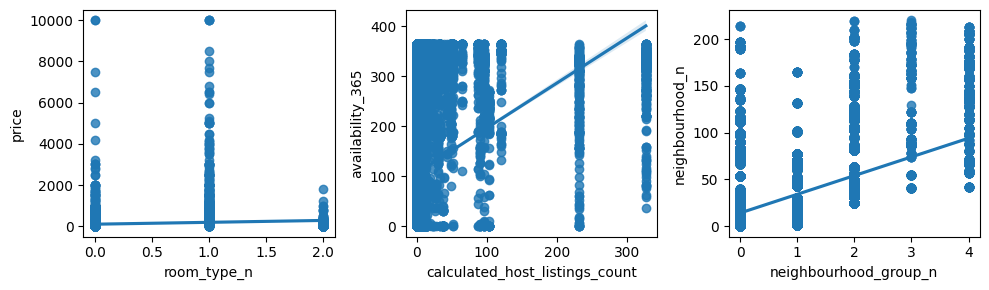

In [66]:
fig, axis = plt.subplots(figsize = (10, 3), ncols = 3)

sns.regplot(ax = axis[0], data = df, x = "room_type_n", y = "price")
sns.regplot(ax = axis[1], data = df, x = "calculated_host_listings_count", y = "availability_365")
sns.regplot(ax = axis[2], data = df, x = "neighbourhood_group_n", y = "neighbourhood_n")

plt.tight_layout()

plt.show()

## Ingeniería de características

Análisis de datos atipicos (Outliers)

In [67]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327,0.786911,0.567113,29.888782
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289,0.844386,0.541249,34.676634
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,1.000000,1.000000,37.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,2.000000,220.000000


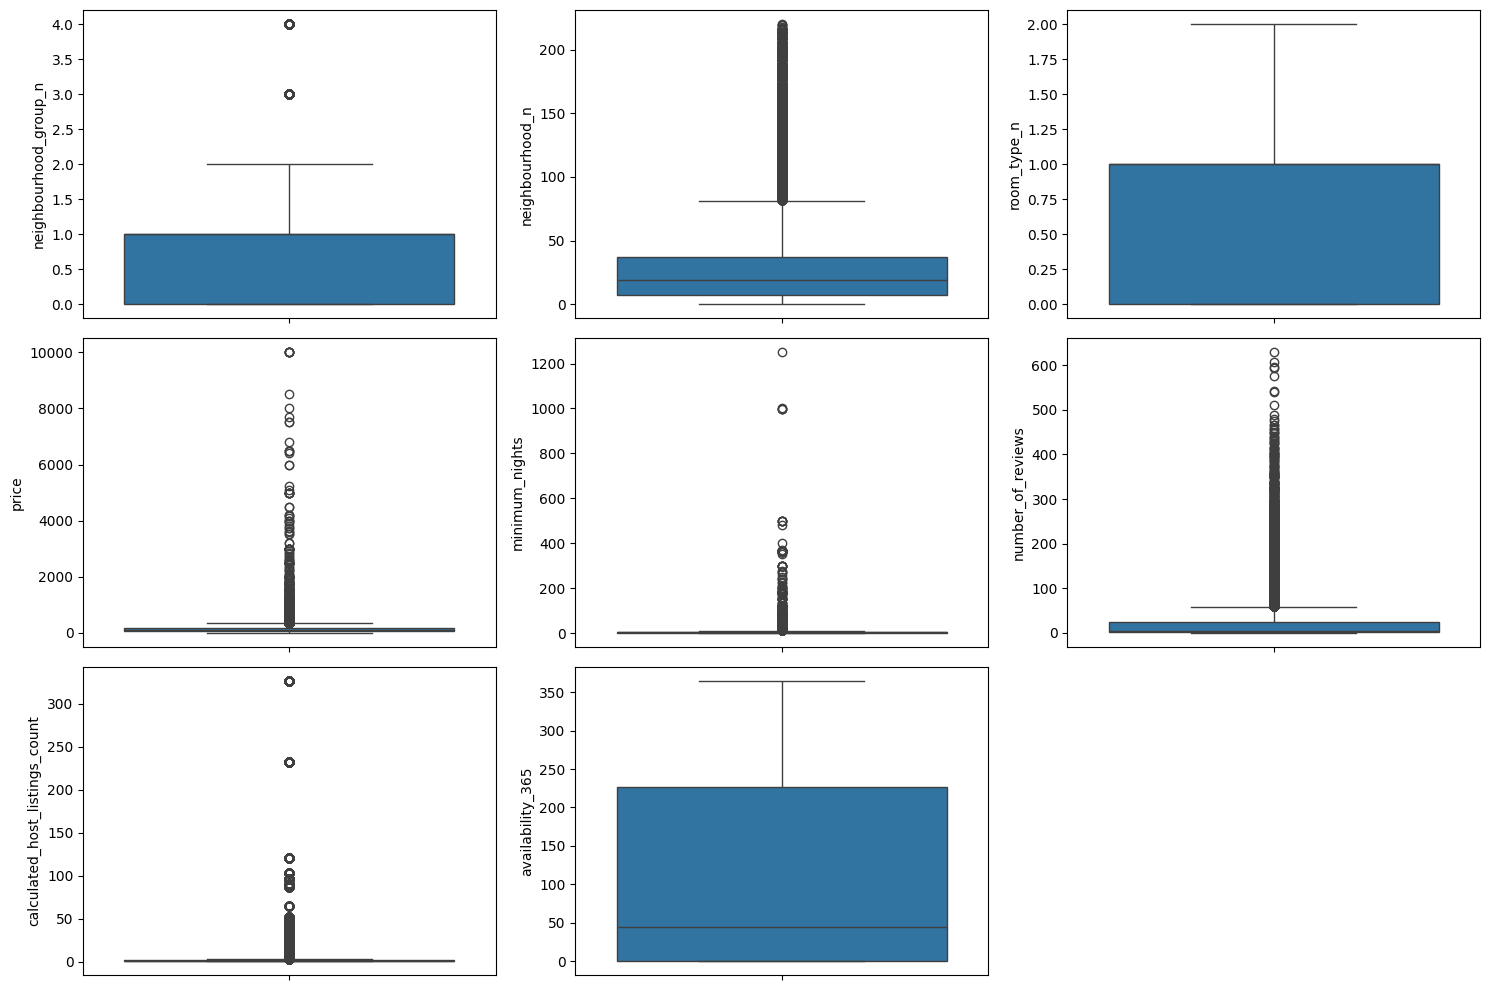

In [68]:
# Crear la figura y los ejes de las subtramas
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

# Graficar cada boxplot en su subtrama correspondiente
sns.boxplot(ax = axis[0, 0], data = df, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[0, 1], data = df, y = "neighbourhood_n")
sns.boxplot(ax = axis[0, 2], data = df, y = "room_type_n")
sns.boxplot(ax = axis[1, 0], data = df, y = "price")
sns.boxplot(ax = axis[1, 1], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 0], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = df, y = "availability_365")


# Eliminar las subtramas vacías
fig.delaxes(axis[2, 2])

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Para minimum_nights


In [69]:
nights_stats = df["minimum_nights"].describe()
print(nights_stats)

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


Al ejecutar la funcion .describe() para la variable minimum_nights podemos observar un valor promedio de 7.02, un valor de 50% de 3, un valor de 1 al 25% y minimo de 1. Un 75% de 5 pero un max de 1250% que refuerza la teoria de los outliers en esta variable.

In [70]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]
upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 11.0 y -5.0, con un rango intercuartílico de 4.0


In [71]:
# proporcion de valores mayores al limite superior

cantidad1 = (df['minimum_nights'] > 11).sum()
print(counter/len(df))

0.13512629103180285


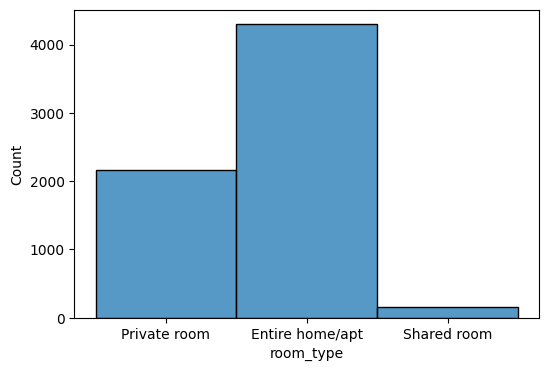

In [72]:
query2 = df.query("minimum_nights > 11")[['room_type','price']]
plt.figure(figsize = (6, 4))
sns.histplot(data=query2, x = "room_type")
plt.show()

La mayoría de los hospedajes que exigen más de 11 noches minimas de hospedaje, son casas o apartamentos. Luego les siguen las habitaciones privadas

In [73]:
df_new = df[df["minimum_nights"] <= 11]

Para number_of_reviews

In [74]:
review_stats = df_new["number_of_reviews"].describe()
print(review_stats)

count    42288.000000
mean        25.636871
std         46.682651
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64


In [75]:
reviews_iqr = review_stats["75%"] - review_stats["25%"]
upper_limit = review_stats["75%"] + 1.5 * reviews_iqr
lower_limit = review_stats["25%"] - 1.5 * reviews_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 66.0 y -38.0, con un rango intercuartílico de 4.0


In [77]:
# proporcion de valores mayores al limite superior

cantidad2 = (df_new['number_of_reviews'] > 66).sum()
print(cantidad2/len(df))

0.10420288373044279


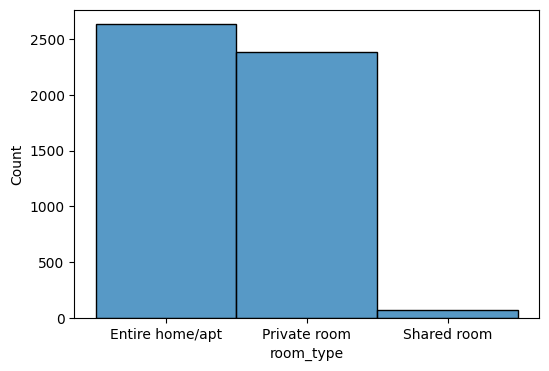

In [78]:
query3 = df_new.query("number_of_reviews > 66")[['room_type','price']]
plt.figure(figsize = (6, 4))
sns.histplot(data=query3, x = "room_type")
plt.show()

In [79]:
df_new = df_new[df_new["number_of_reviews"] <= 66]

Para price

In [80]:
price_stats = df_new["price"].describe()
print(price_stats)

count    37193.000000
mean       152.551851
std        221.353965
min          0.000000
25%         69.000000
50%        104.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [81]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 4.0


In [82]:
# proporcion de valores mayores al limite superior

cantidad3 = (df_new['price'] > 334).sum()
print(cantidad3/len(df))

0.049371101339605275


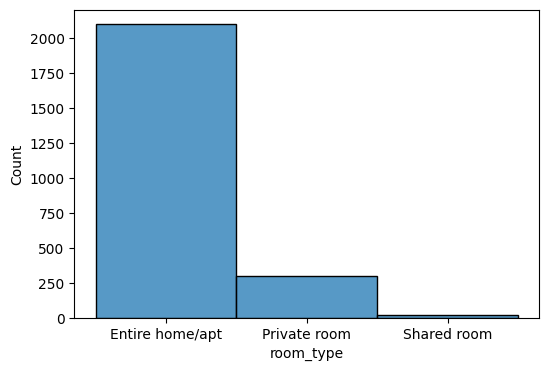

In [83]:
query4 = df_new.query("price > 334")[['room_type','price']]
plt.figure(figsize = (6, 4))
sns.histplot(data=query4, x = "room_type")
plt.show()

La mayoría de los hospedajes con precio > $334 corresponde a casas/apt completos.

In [85]:
df_new = df_new[df_new["price"] <= 334]

Para calculated_host_listing_count

In [86]:
calculated_host_listings_count_stats = df_new["calculated_host_listings_count"].describe()
print(calculated_host_listings_count_stats)

count    34779.000000
mean         3.216366
std         21.086290
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


In [87]:
calculated_host_listings_count_iqr = calculated_host_listings_count_stats["75%"] - calculated_host_listings_count_stats["25%"]
upper_limit = calculated_host_listings_count_stats["75%"] + 1.5 * calculated_host_listings_count_iqr
lower_limit = calculated_host_listings_count_stats["25%"] - 1.5 * calculated_host_listings_count_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3.5 y -0.5, con un rango intercuartílico de 4.0


In [88]:
cantidad4 = (df_new['calculated_host_listings_count'] > 4).sum()
print(cantidad4/len(df))

0.04581245526127416


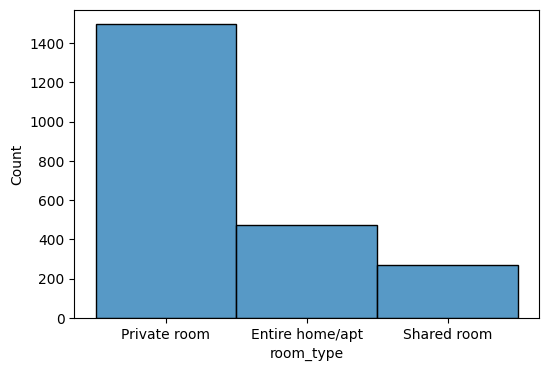

In [89]:
query5 = df_new.query("calculated_host_listings_count > 4")[['room_type','price']]
plt.figure(figsize = (6, 4))
sns.histplot(data=query5, x = "room_type")
plt.show()

El tipo de hospedaje con más reviews es para cuarto privado, luego le sigue hospedaje completo.


In [90]:
df_new = df_new[df_new["calculated_host_listings_count"] <= 4]

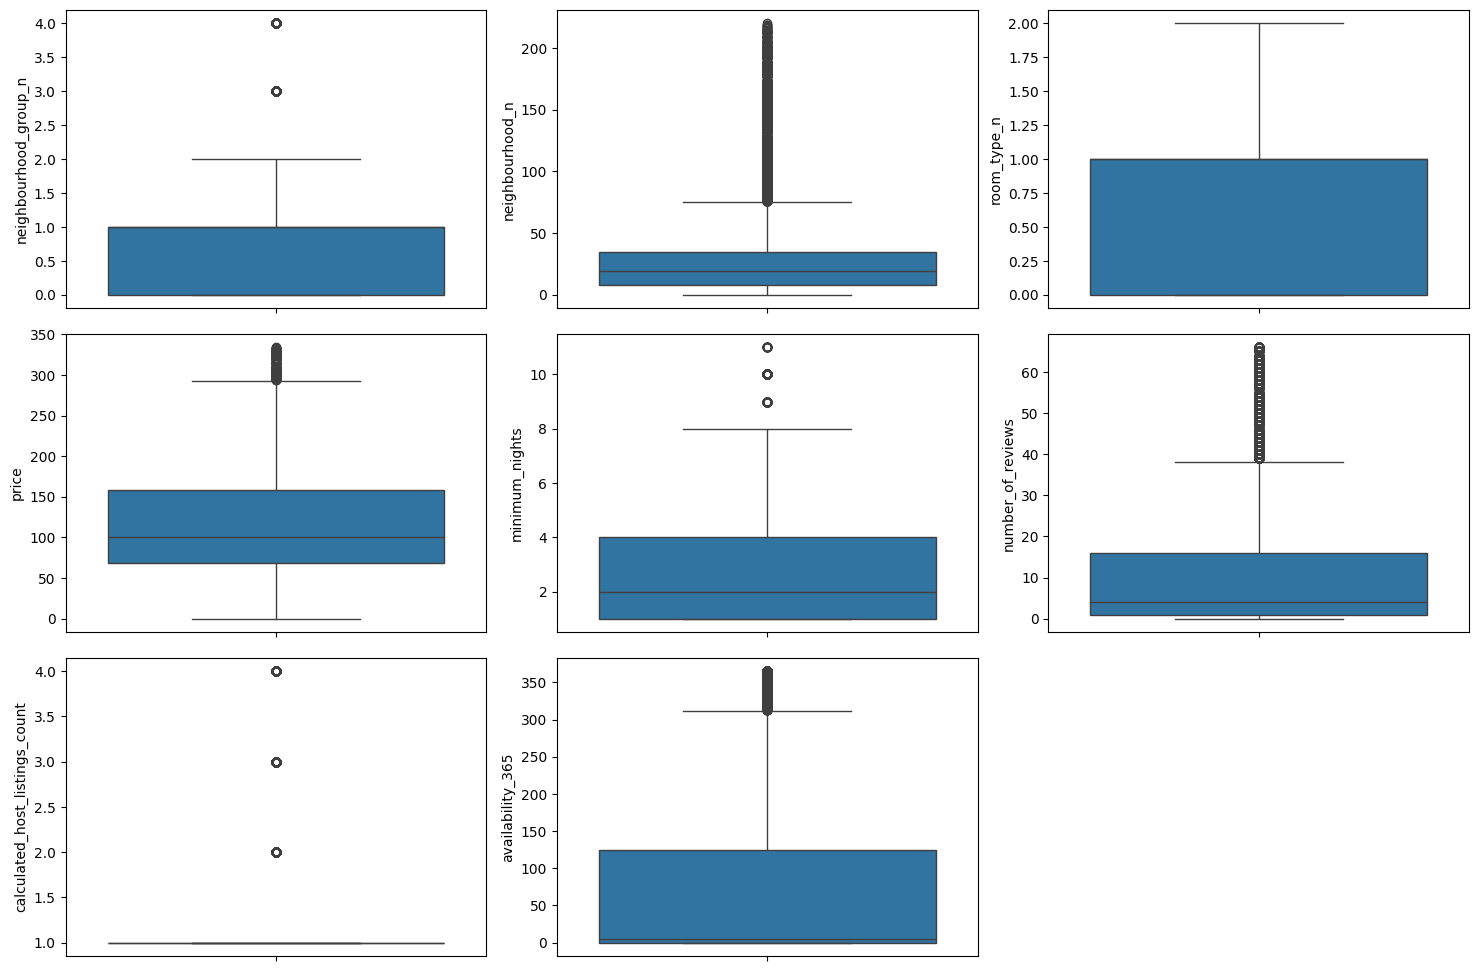

In [91]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df_new, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[0, 1], data = df_new, y = "neighbourhood_n")
sns.boxplot(ax = axis[0, 2], data = df_new, y = "room_type_n")
sns.boxplot(ax = axis[1, 0], data = df_new, y = "price")
sns.boxplot(ax = axis[1, 1], data = df_new, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = df_new, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 0], data = df_new, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = df_new, y = "availability_365")

plt.tight_layout()
fig.delaxes(axis[2, 2])

plt.show()

Análisis de valores faltantes


In [92]:
df_new.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood_group_n             0
room_type_n                       0
neighbourhood_n                   0
dtype: int64

No existen valores faltantes en el conjunto de datos

Division del conjunto: Train and Test

In [93]:
from sklearn.model_selection import train_test_split

num_variables = ["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]

# We divide the dataset into training and test samples
X = df_new[num_variables]
y = df_new["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48450,0,113,1,3,0,1,0
45787,2,31,1,1,3,2,155
9466,1,8,0,1,0,1,0
30206,0,12,1,6,11,1,0
35123,1,14,1,6,5,1,0


Standard scaling

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,neighbourhood_group_n,neighbourhood_n,room_type_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
48450,-0.881739,2.335832,0.878935,0.096090,-0.747135,-0.490769,-0.673133
45787,1.419614,0.016802,0.878935,-0.942449,-0.553676,0.897236,0.664263
9466,0.268938,-0.633658,-0.983160,-0.942449,-0.747135,-0.490769,-0.673133
30206,-0.881739,-0.520535,0.878935,1.653898,-0.037786,-0.490769,-0.673133
35123,0.268938,-0.463973,0.878935,1.653898,-0.424704,-0.490769,-0.673133


Feature selection

In [96]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

print(X_train_sel.columns)

X_train_sel.head()

Index(['neighbourhood_n', 'room_type_n', 'number_of_reviews',
       'calculated_host_listings_count'],
      dtype='object')


,neighbourhood_n,room_type_n,number_of_reviews,calculated_host_listings_count
0,113,1,0,1
1,31,1,3,2
2,8,0,0,1
3,12,1,11,1
4,14,1,5,1


In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_airbnb_train.csv", index=False)
X_test_sel.to_csv("../data/processed/clean_airbnb_test.csv", index=False)